In [1]:
from ipynb.fs.defs.functions import data_importing, replace_numbers_with_letters

from dython.nominal import associations

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

In [2]:
data = data_importing(verbose = False)

# Exploratory Data Analysis
or *finding interesting patterns and detect anomalies between making things harder*
### Analysis on X's

In [3]:
dataset = data[1]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   j_zlogz          10000 non-null  float64
 1   j_c1_b0_mmdt     10000 non-null  float64
 2   j_c1_b1_mmdt     10000 non-null  float64
 3   j_c1_b2_mmdt     10000 non-null  float64
 4   j_c2_b1_mmdt     10000 non-null  float64
 5   j_c2_b2_mmdt     10000 non-null  float64
 6   j_d2_b1_mmdt     10000 non-null  float64
 7   j_d2_b2_mmdt     10000 non-null  float64
 8   j_d2_a1_b1_mmdt  10000 non-null  float64
 9   j_d2_a1_b2_mmdt  10000 non-null  float64
 10  j_m2_b1_mmdt     10000 non-null  float64
 11  j_m2_b2_mmdt     10000 non-null  float64
 12  j_n2_b1_mmdt     10000 non-null  float64
 13  j_n2_b2_mmdt     10000 non-null  float64
 14  j_mass_mmdt      10000 non-null  float64
 15  j_multiplicity   10000 non-null  float64
dtypes: float64(16)
memory usage: 1.2 MB
None

Everything seems 

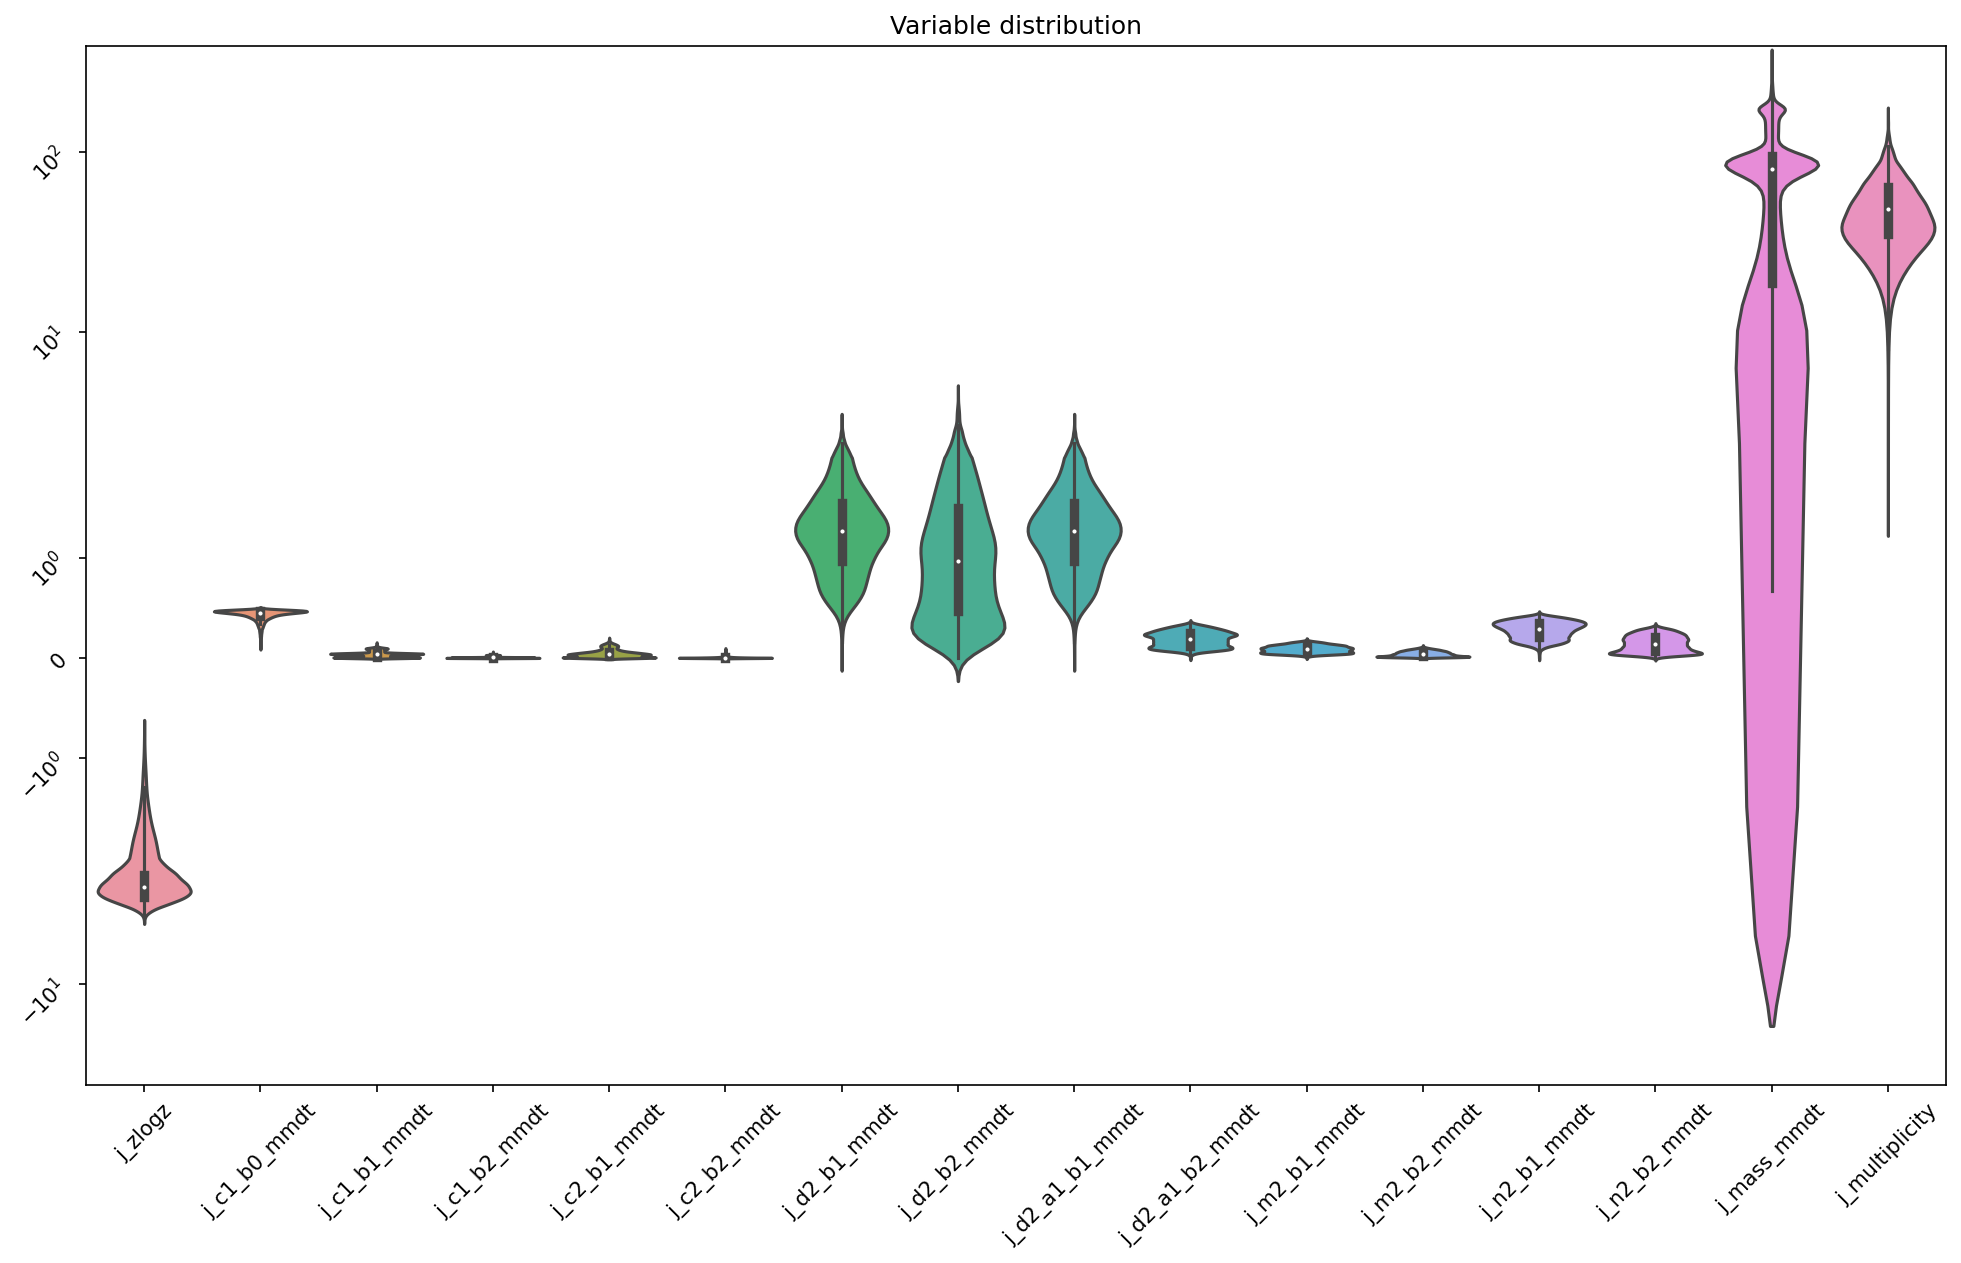


More details:
             j_zlogz  j_c1_b0_mmdt  j_c1_b1_mmdt  j_c1_b2_mmdt  j_c2_b1_mmdt  \
count  10000.000000  10000.000000  10000.000000  1.000000e+04  10000.000000   
mean      -2.855662      0.432722      0.037811  8.050324e-03      0.045304   
std        0.580443      0.055209      0.029239  9.421520e-03      0.038597   
min       -4.452085      0.101666      0.000212  3.719361e-07      0.000009   
25%       -3.274385      0.416808      0.009565  3.098769e-04      0.014995   
50%       -2.904424      0.452043      0.038213  5.992901e-03      0.036471   
75%       -2.475663      0.468595      0.048785  8.275260e-03      0.062075   
max       -0.803105      0.491214      0.147435  6.122257e-02      0.191146   

       j_c2_b2_mmdt  j_d2_b1_mmdt  j_d2_b2_mmdt  j_d2_a1_b1_mmdt  \
count  1.000000e+04  10000.000000  10000.000000     10000.000000   
mean   7.573312e-03      1.287895      1.073581         1.287895   
std    1.222201e-02      0.455578      0.727786         0.455578   


In [4]:
def metrics_on_x():

    print(dataset.info())
    print('\nEverything seems ok!\n')

    plt.figure(figsize = (16,9), dpi = 150)

    # Create a plot where the median, quartiles, outliers and probability distribution are shown for each column
    sns.violinplot(x="variable", y="value", data=pd.melt(dataset), scale = 'count')

    plt.tick_params(labelrotation = 45, labelsize = 10)
    plt.xlabel(None)
    plt.ylabel(None)

    if (dataset < 0).any().any():
        plt.yscale('symlog')
    else:
        plt.yscale('log')

    plt.title('Variable distribution')
    plt.show()

    # Give extra details about distribution
    print('\nMore details:\n', dataset.describe())

metrics_on_x()

### Analysis on y's

In [5]:
target = data[-1]

def metrics_on_y():

    # Extracting details
    print(target.info())

    # Checking if one and only one 1.0 per row
    print('\nDoes each row have one and only one 1 for each row?')
    if (target.sum(axis = 0).sum() == len(target)) & ((target.sum(axis = 1) > 0).any()):
        print('YES!\n')
    else:
        print('!!! THE DATASET HAS SOME PROBLEMS !!!\n')

    # Checking for imbalances
    print('Checking the pct distribution of each class to assess class unbalancing')
    print(target.sum(axis = 0) / len(target) * 100)

metrics_on_y()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10000 non-null  float64
 1   1       10000 non-null  float64
 2   2       10000 non-null  float64
 3   3       10000 non-null  float64
 4   4       10000 non-null  float64
dtypes: float64(5)
memory usage: 390.8 KB
None

Does each row have one and only one 1 for each row?
YES!

Checking the pct distribution of each class to assess class unbalancing
0    19.69
1    19.71
2    19.67
3    20.25
4    20.68
dtype: float64


### Correlation analysis between X's and y's

Correlation matrix with one-hot encoded target variables


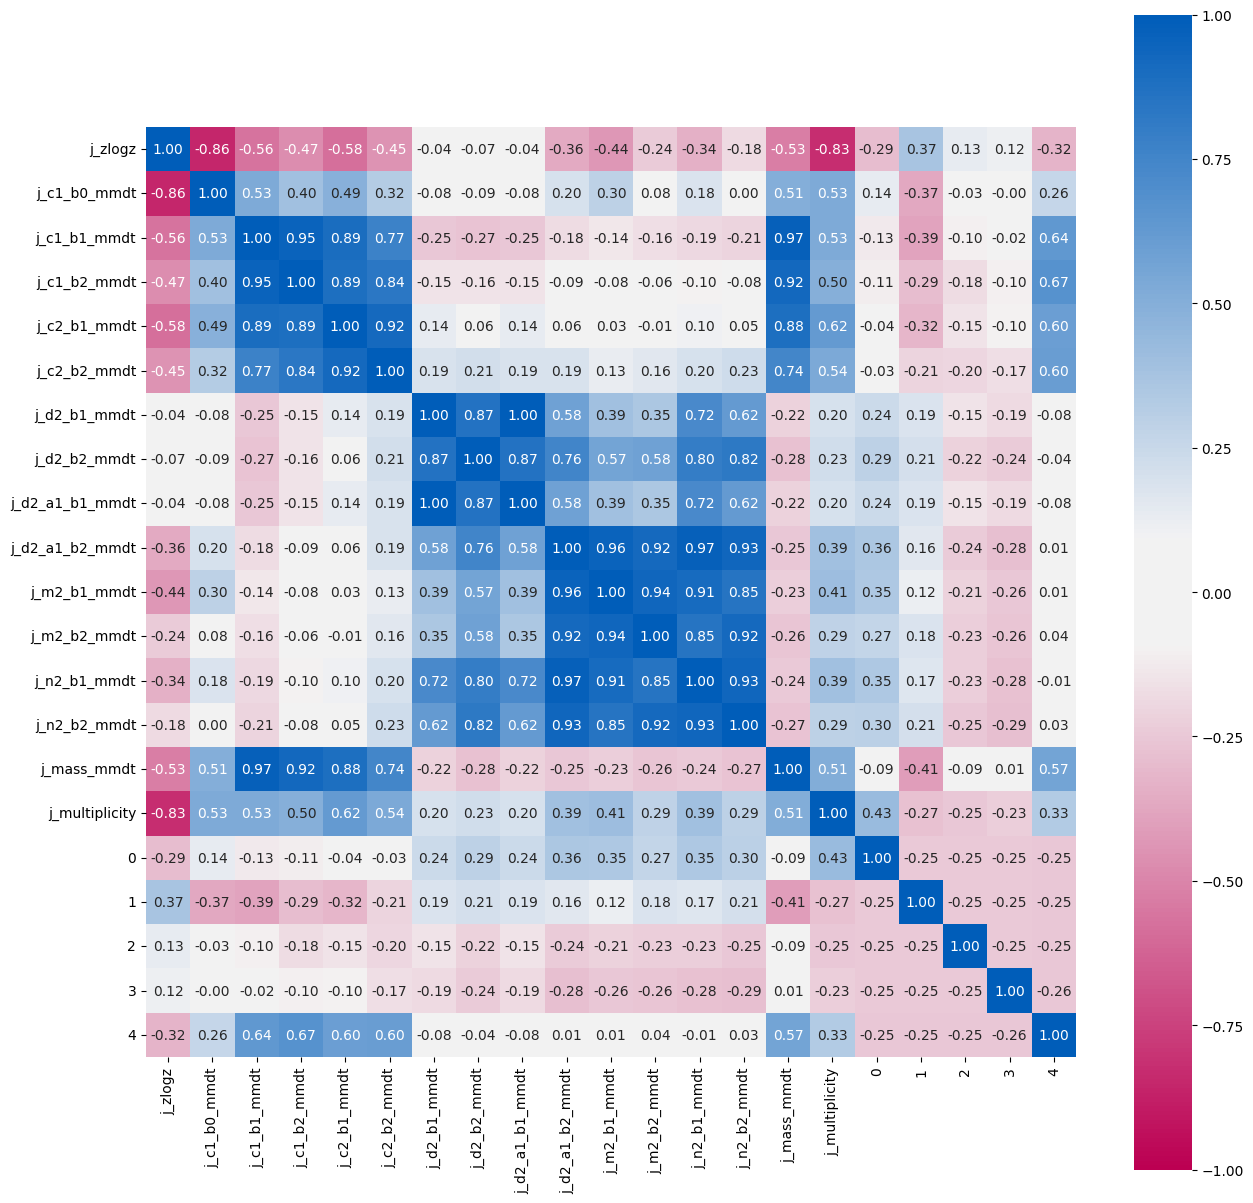

Correlation matrix with labelled target variable


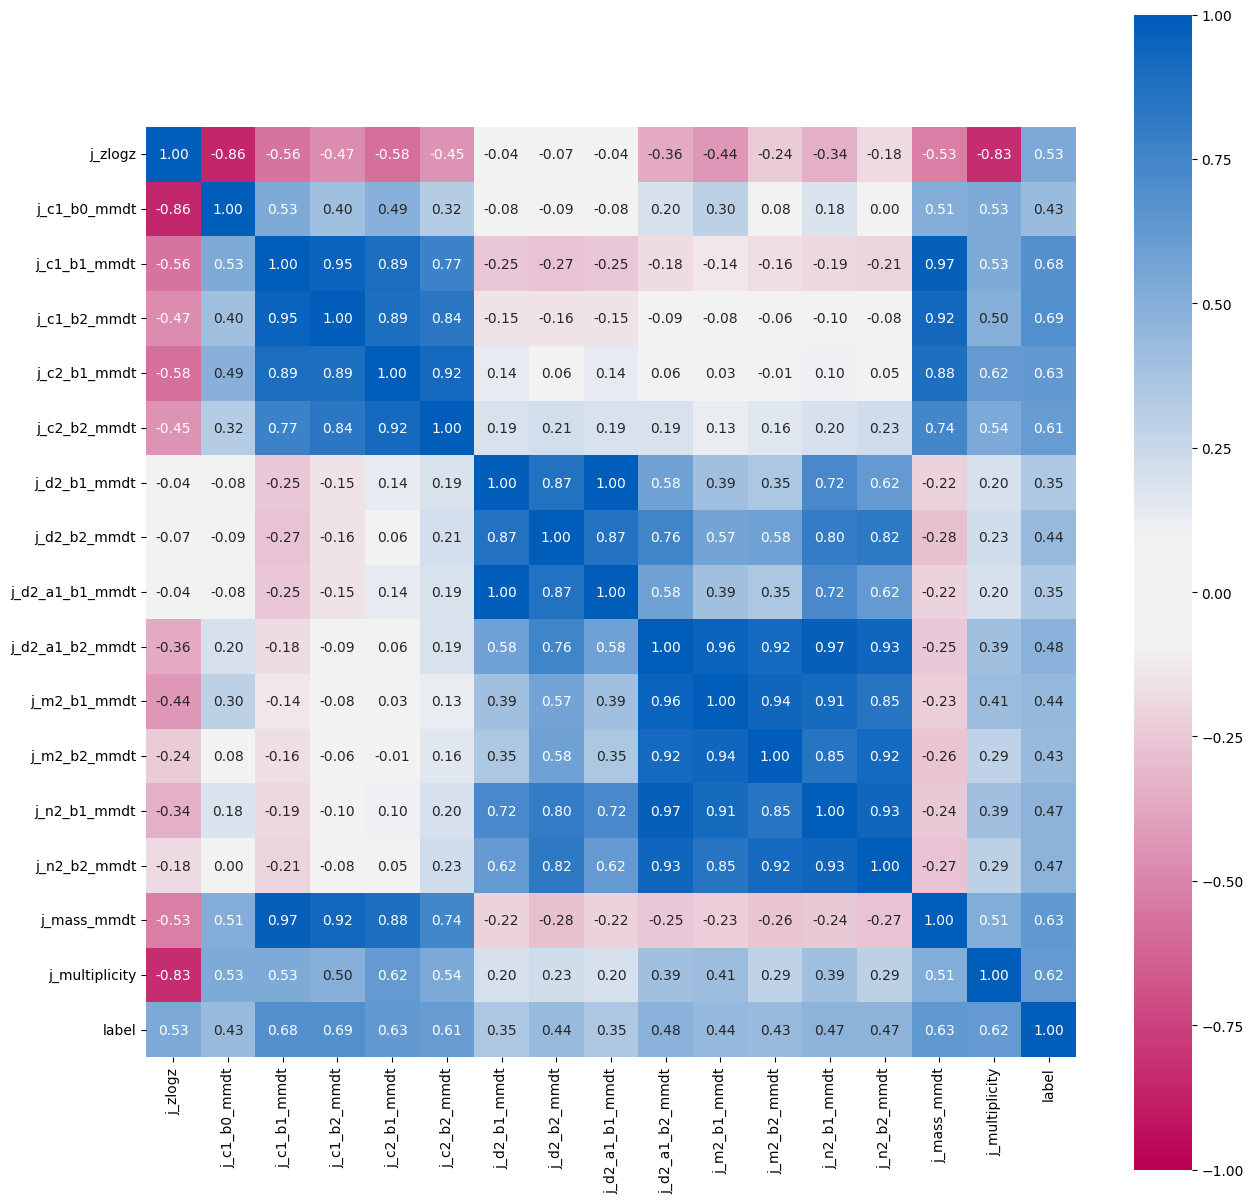

Plot pairwise relationship in a random 10% subset of the dataset: 



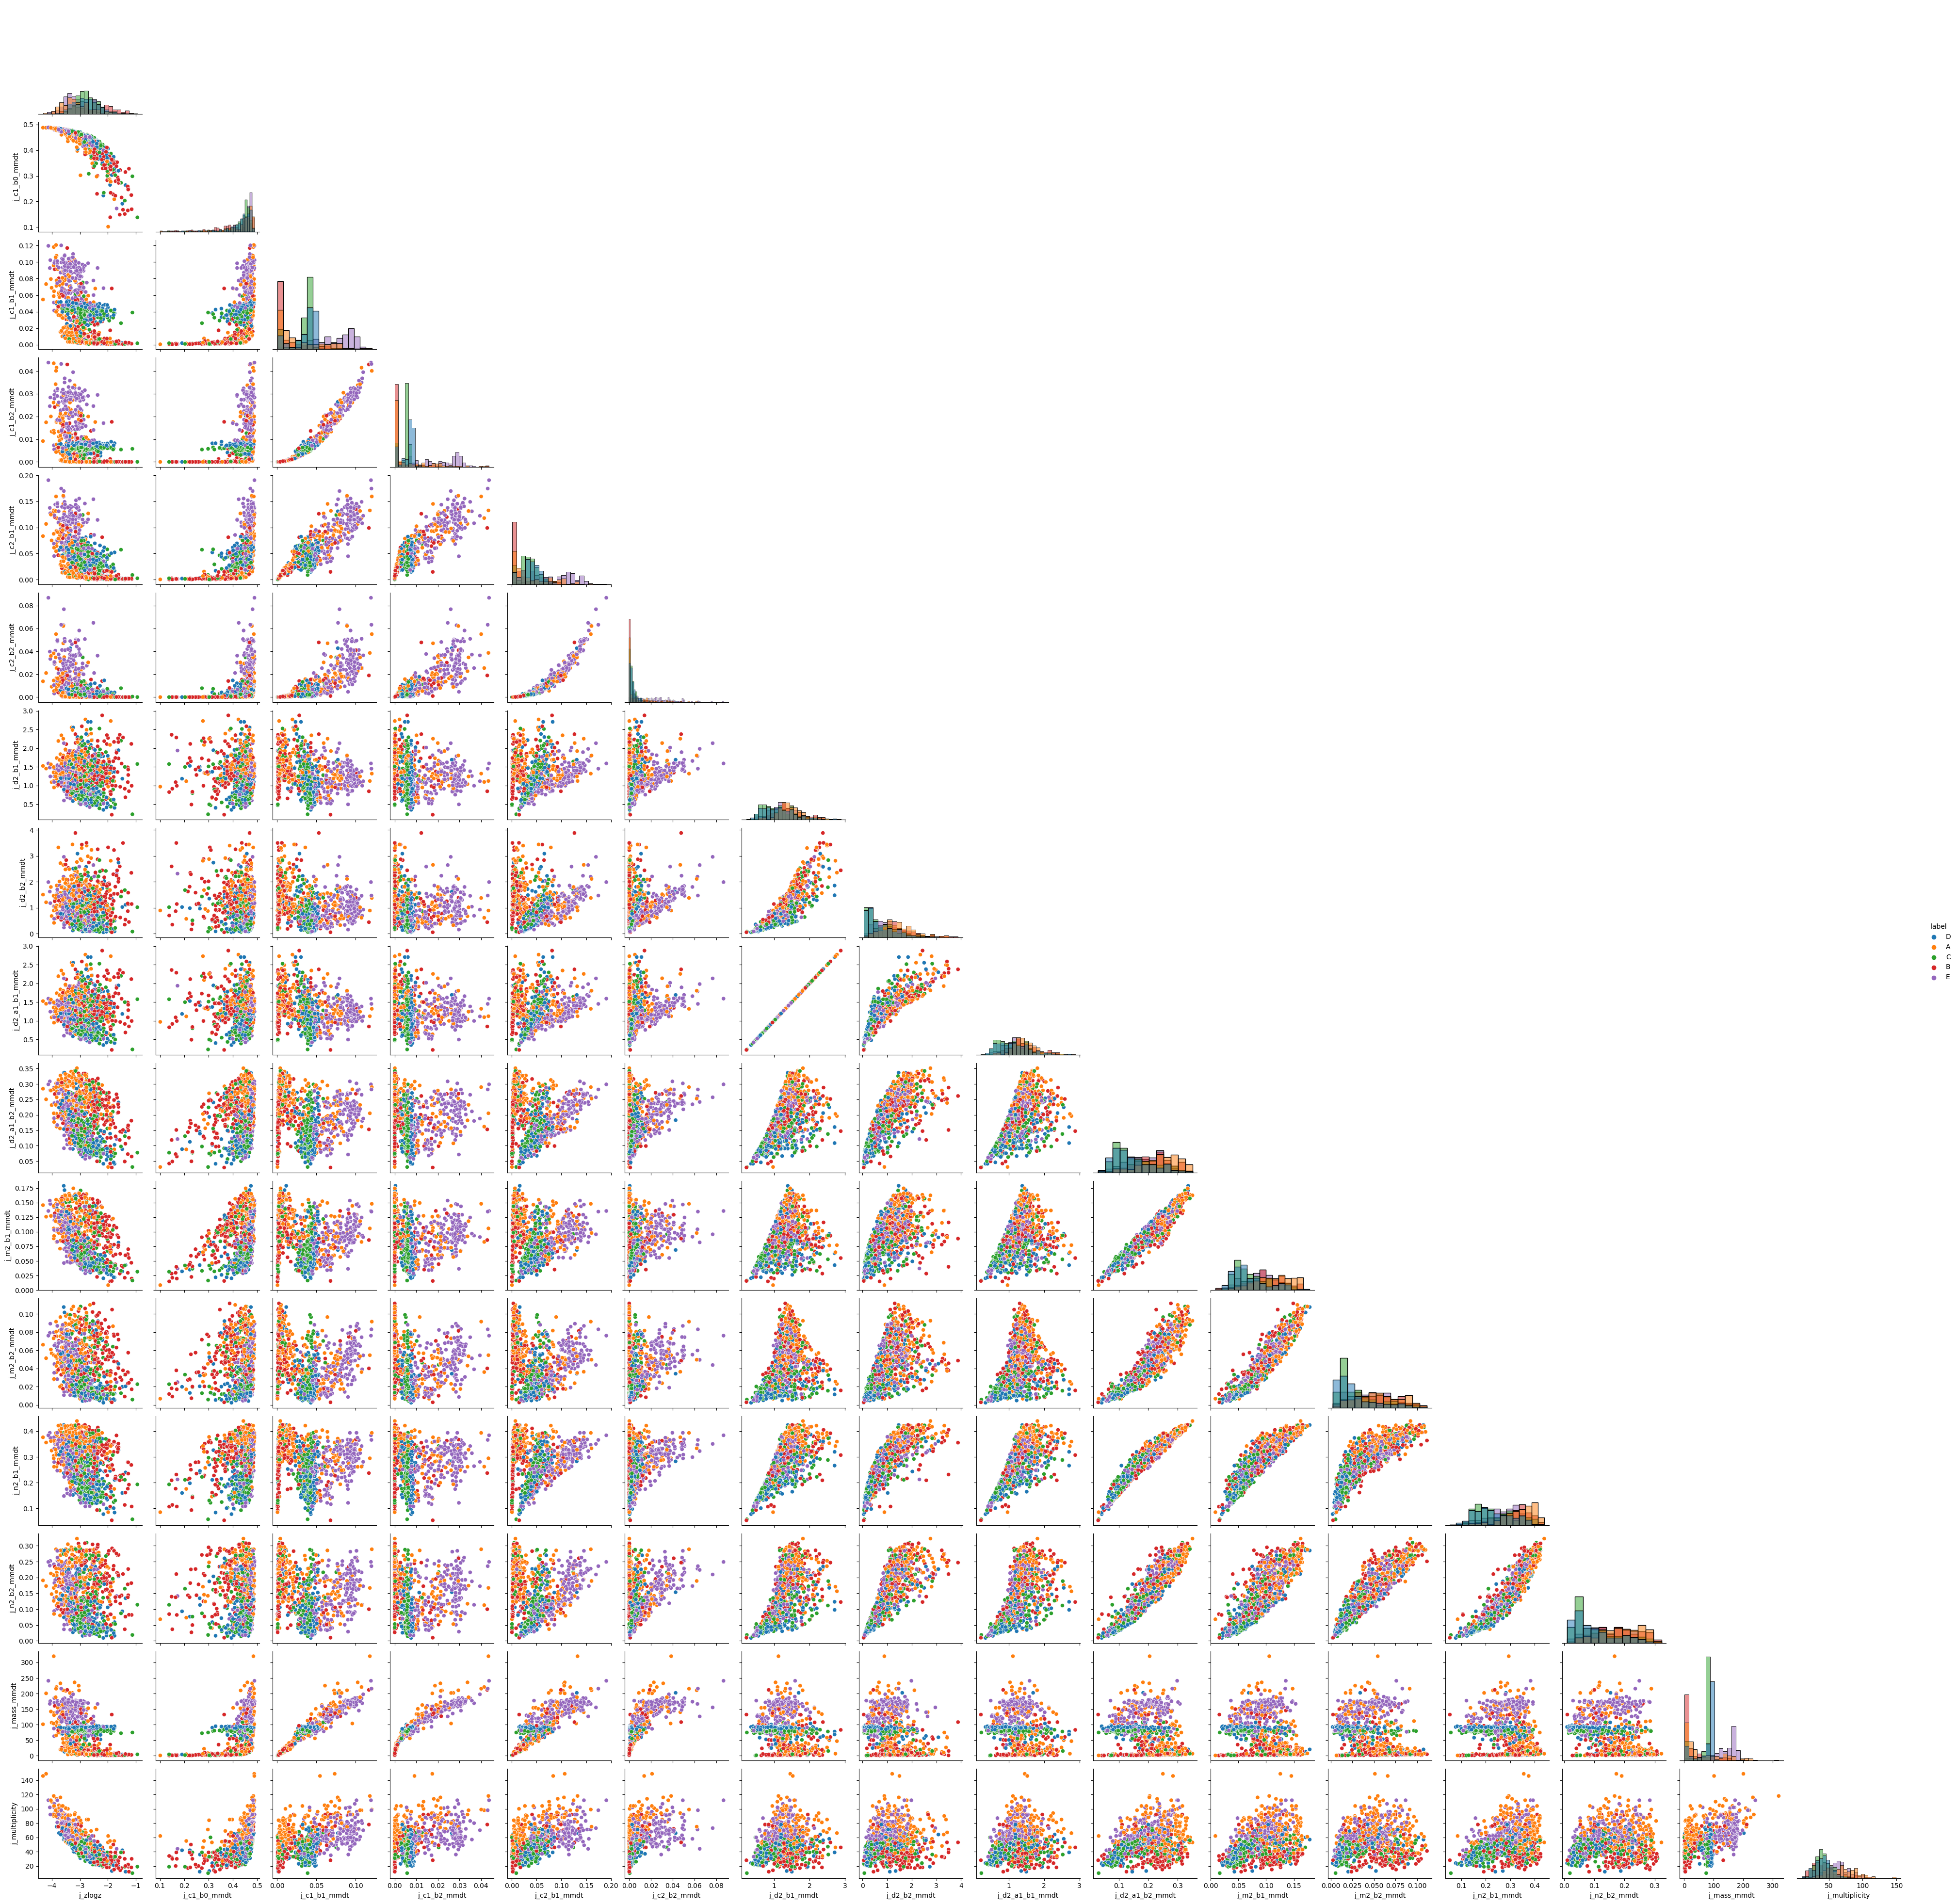

In [6]:
def corr_matrix(x):
        complete_correlation = associations(x,
                                            figsize=(15, 15),
                                            cmap = sns.diverging_palette(h_pos = 255, h_neg = 359, s=100, l=40, n=3, sep = 25,
                                                                         center="light", as_cmap=True))

def correlation():

    dataset_full_ohc = pd.concat([dataset, target], axis = 1)
    print('Correlation matrix with one-hot encoded target variables')
    corr_matrix(dataset_full_ohc)

    dataset_full_label = replace_numbers_with_letters(target, 'letter')
    dataset_full_label = pd.concat([dataset, dataset_full_label], axis = 1)

    print('Correlation matrix with labelled target variable')
    corr_matrix(dataset_full_label)

    print('Plot pairwise relationship in a random 10% subset of the dataset: \n')
    sns.pairplot(dataset_full_label.sample(frac = 0.1), hue = 'label', diag_kind="hist", corner = True)

correlation()